In [226]:
import matplotlib.pyplot as pl
import matplotlib as mpl
pl.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
import seaborn as sns

In [227]:
births=pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


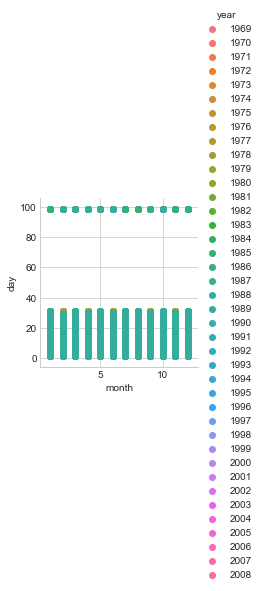

In [228]:
sns.FacetGrid(births,hue="year")\
    .map(pl.scatter,"month","day")\
    .add_legend()

In [229]:
quartiles=np.percentile(births['births'],[25,50,75])
# print("min is",np.min(births.births))
# print("max is",np.max(births.births))
# quartiles
# births.dropna(inplace=True)
# births.shape

In [230]:
mu,sig=quartiles[1],0.74*(quartiles[2]-quartiles[0])
births=births.query('(births>@mu-5*@sig)&(births<@mu+5*@sig)')
births['day']=births['day'].astype(int)

C:\Users\RINSU\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [231]:
births.shape

(14610, 5)

In [232]:
births.index=pd.to_datetime(10000*births.year+
                            100*births.month+
                            births.day,format='%Y%m%d'
                           )

In [233]:
births.head()

,year,month,day,gender,births
1969-01-01,1969,1,1,F,4046
1969-01-01,1969,1,1,M,4440
1969-01-02,1969,1,2,F,4454
1969-01-02,1969,1,2,M,4548
1969-01-03,1969,1,3,F,4548


In [238]:
births_bydate=births.pivot_table('births',
                                 [births.index.month,births.index.day])
births_bydate.index = [pd.datetime(2012, month, day) for (month, day) in births_bydate.index]
births_bydate

C:\Users\RINSU\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625
...,...
2012-12-27,4850.150
2012-12-28,5044.200
2012-12-29,5120.150
2012-12-30,5172.350


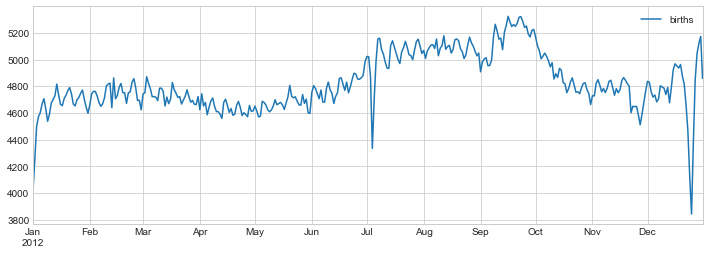

In [239]:
fig,ax=pl.subplots(figsize=(12,4))
births_bydate.plot(ax=ax)